<a href="https://colab.research.google.com/github/OmdenaAI/omdena-france-pollution/blob/main/Nice_saint_Etienne_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import xlrd
import plotly.express as px

In [2]:
 cities=['Nice','Saint-Étienne']
 pollutants=['co','no2','o3','so2','pm1','pm10','pm25']
data=pd.read_csv('france_air_quality_data_merged.csv')
data=data.loc[data['City'].isin(cities)]
data=data.loc[data['Specie'].isin(pollutants)]


data['Date']=data['Date'].astype('str')

data=data.reset_index()
data.drop('index',inplace=True,axis=1)
data.head()

,Date,City,Specie,count,min,max,median,variance
0,2019-07-01,Nice,pm10,56,15.0,62.0,27.0,800.00
1,2019-07-01,Saint-Étienne,o3,69,9.0,83.8,44.7,3508.16
2,2019-07-01,Nice,o3,24,10.5,61.6,40.0,2291.54
3,2019-07-01,Saint-Étienne,no2,93,1.6,38.5,6.2,631.85
4,2019-07-01,Nice,pm25,47,43.0,80.0,61.0,773.76


In [3]:
specie=data['Specie'].values
np.unique(specie)

array(['no2', 'o3', 'pm10', 'pm25'], dtype=object)

In [4]:
data

,Date,City,Specie,count,min,max,median,variance
0,2019-07-01,Nice,pm10,56,15.0,62.0,27.0,800.00
1,2019-07-01,Saint-Étienne,o3,69,9.0,83.8,44.7,3508.16
2,2019-07-01,Nice,o3,24,10.5,61.6,40.0,2291.54
3,2019-07-01,Saint-Étienne,no2,93,1.6,38.5,6.2,631.85
4,2019-07-01,Nice,pm25,47,43.0,80.0,61.0,773.76
...,...,...,...,...,...,...,...,...
6391,2021-07-27,Nice,o3,27,4.2,24.1,14.5,380.23
6392,2021-07-27,Saint-Étienne,o3,18,4.4,23.2,13.7,327.94
6393,2021-07-27,Saint-Étienne,no2,35,2.2,18.1,6.4,161.82
6394,2021-07-27,Saint-Étienne,pm10,35,7.0,50.0,11.0,539.38


#visualization

In [5]:
scatter=px.scatter(data_frame=data,x='count',y='median',animation_group='Specie',animation_frame='Date',size=data["count"], color="Specie", hover_name="Specie", facet_col="Specie")
scatter.update_layout(height=450, width=1200, title_text="Average Concentration of Air Pollutants in Nice and saint-Etienne ") 
scatter.update_xaxes(title_text = "count", rangeslider_visible=False, showline=True, linewidth=2, linecolor='black', mirror=True)
scatter.update_yaxes(title_text = "Average Concentration", showline=True, linewidth=2, linecolor='black', mirror=True)
scatter.show()

In [16]:
fig = px.bar(data_frame=data, x = 'Specie', y = "median", animation_frame = "Date",animation_group="Specie", color = "City",facet_col="City")
fig.show()

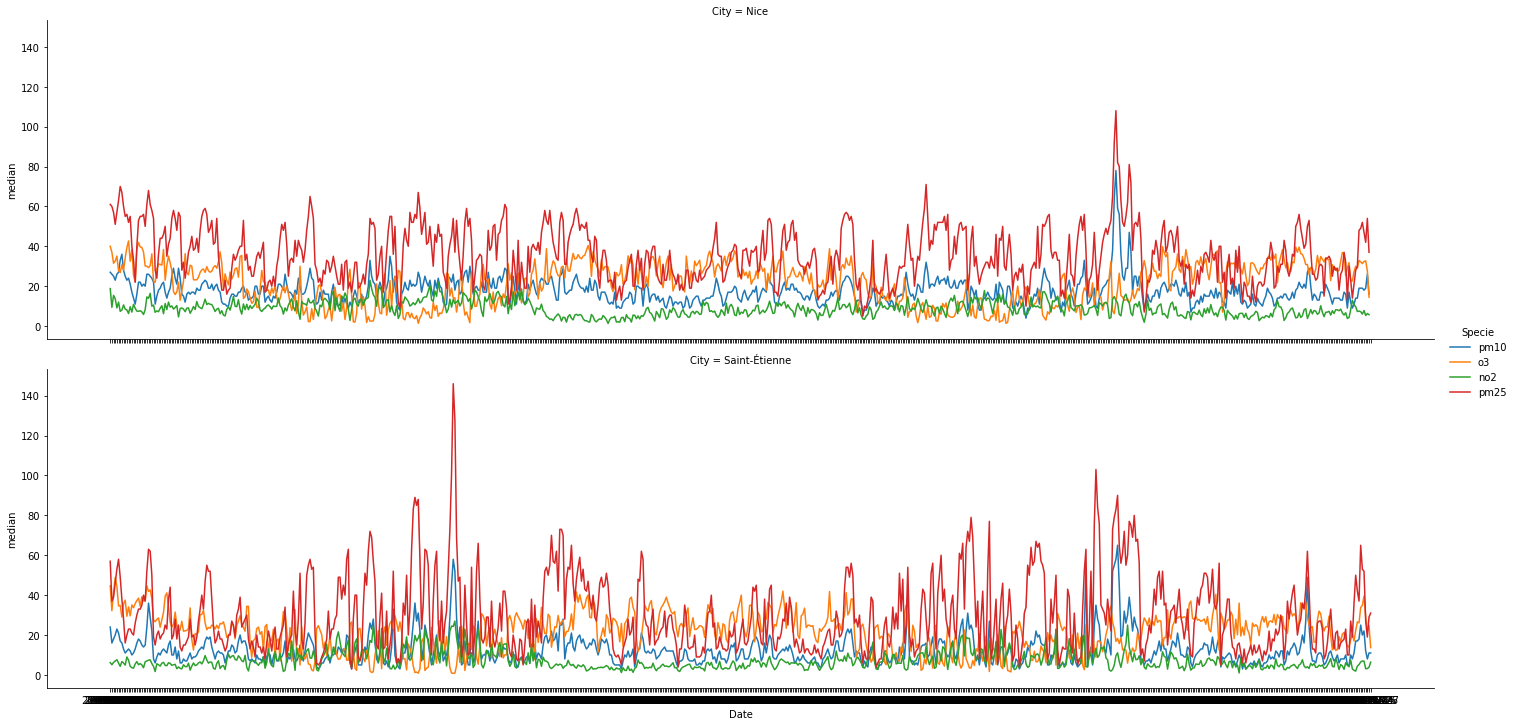

In [7]:
sns.relplot(data=data,x='Date',y="median",hue='Specie',kind='line',row='City',aspect=4)

In [8]:
data_pm10=data.loc[data['Specie']=="pm10"]
data_o3=data.loc[data['Specie']=="o3"]
data_no2=data.loc[data['Specie']=="no2"]
data_pm25=data.loc[data['Specie']=="pm25"]
fig_pm10 = px.line(data_pm10, x="Date", y="median", color='City', title='Pm10 average')
fig_o3 = px.line(data_o3, x="Date", y="median", color='City', title='o3 average')
fig_no2 = px.line(data_no2, x="Date", y="median", color='City', title='no2 average')
fig_pm25 = px.line(data_pm25, x="Date", y="median", color='City', title='pm25 average')

fig_pm10.show()
fig_o3.show()
fig_no2.show()
fig_pm25.show()

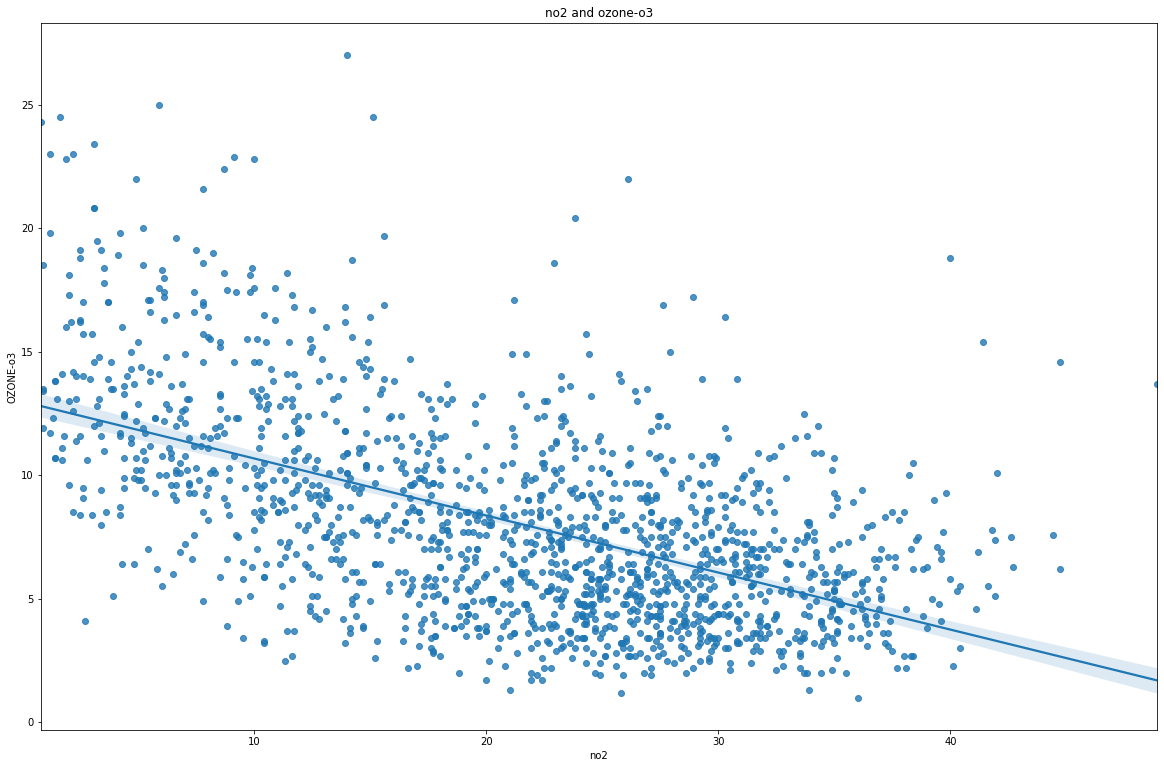

In [12]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(x=data_o3['median'],y=data_no2['median'],label='no2')
ax.set_xlabel('no2')
ax.set_ylabel('OZONE-o3')
fig.show()

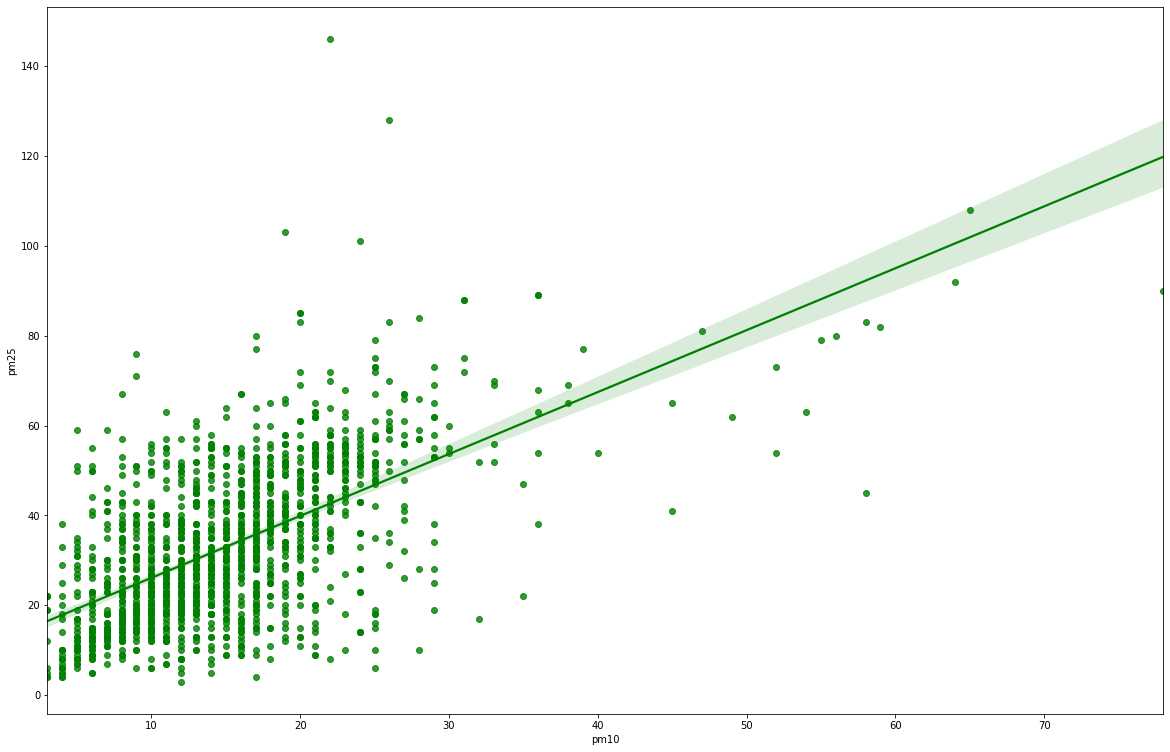

In [15]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(x=data_pm10['median'],y=data_pm25['median'],label='no2',color='green')
ax.set_xlabel('pm10')
ax.set_ylabel('pm25')
fig.show()